# EDA
Questo notebook verrà usato per l'exploratory data analysis non comprensiva di machine learning

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

#Per usare multi cartelle (cookiecutter)
import sys
sys.path.append('./../src')

import make_dataset as m_d
import EDA

sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2.5})
sns.set(rc={'figure.figsize':(7,6)})


### Per usare multi cartelle (cookiecutter)
#import sys
#sys.path.append('./../src')
#print(sys.path)

In [2]:
#Importiamo il database dei tweets

df=pd.read_csv(m_d.data_path_out / 'twitter_final.csv')
temperature_D=EDA.tempDistrib()

#col_list = list(df)
#col_list[6], col_list[5] = col_list[5], col_list[6]
#df.plot('municipal')
df

,month,day,hours,temperature,rain,municipal,cellId,language,circoscrizione
0,11,1,0.0,13.2,0.0,Trento,5201,it,S.GIUSEPPE-S.CHIARA
1,11,1,1.0,12.9,0.0,Pinzolo,7167,tl,NaN
2,11,1,1.5,12.4,0.0,Cavalese,8151,en,NaN
3,11,1,16.5,14.8,0.0,Rovereto,2855,it,NaN
4,11,1,17.0,14.4,0.0,San Michele all'Adige,6838,ru,NaN
...,...,...,...,...,...,...,...,...,...
27936,12,31,22.5,-3.4,0.0,Vigo di Fassa,9922,it,NaN
27937,12,31,22.5,-3.4,0.0,Predazzo,8513,it,NaN
27938,12,31,23.5,-5.1,0.0,Sant'Orsola Terme,5799,it,NaN
27939,12,31,23.5,-4.5,0.0,Sant'Orsola Terme,5799,it,NaN


# Plots

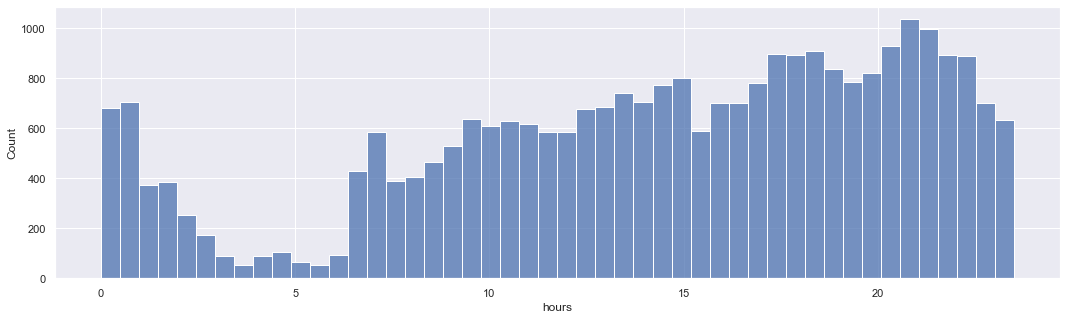

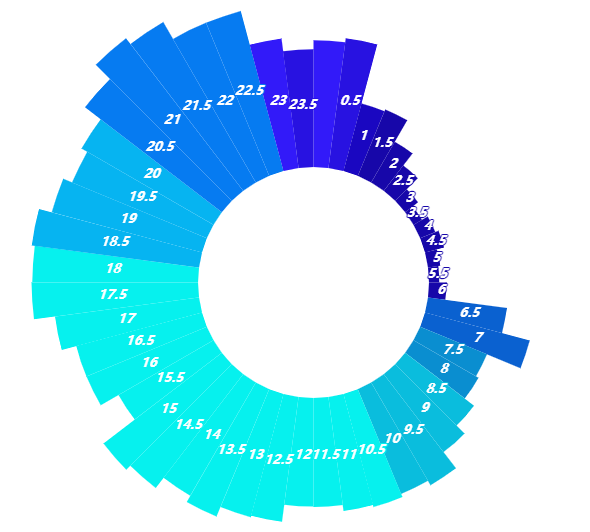

In [3]:
#Plot occurences versus tempo
plt.figure(figsize = (18,5))
sns.histplot(data=df, x="hours", bins=48)
plt.show()

#Vista la ciclicità del notte-giorno, l'histogram vien molto brutto; andiam di Nightingale
"""
NightP=EDA.Nightingale_Plot(df["hours"])
NightP.render_notebook()
#Per qualche ragione servon librerie oscure
"""


#Risultato ovvio: la gente twitta meno di notte che di giorno, verso la sera sembra essere il momento preferito

In [ ]:
from IPython.display import Image
Image(filename='NightGraph.png') 
#Lo lascio come immagine così non serve avere la libreria 


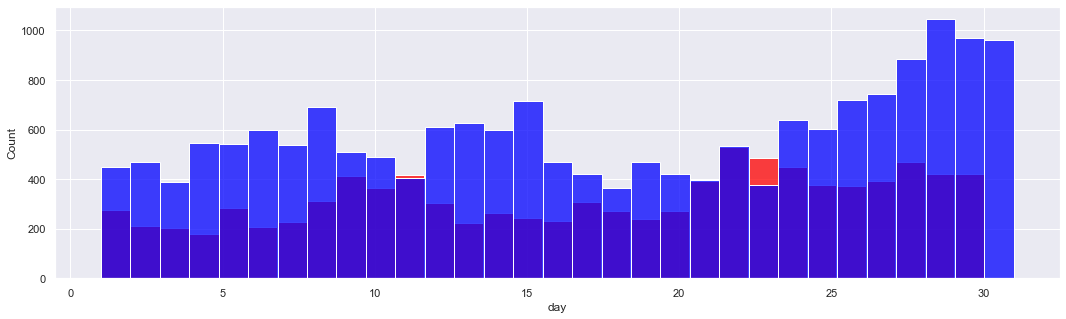

In [4]:
plt.figure(figsize = (18,5))
sns.histplot(data=df[df["month"]==11], x="day", bins=30, color="#FF0000")
sns.histplot(data=df[df["month"]==12], x="day", bins=31, color="#0000FF")
plt.show()
#Nota: noiosi da disjointare in maniera sensata

#Risultato: a gente twitta di più a Dicembre, soprattutto verso la fine (periodo di vacanze)

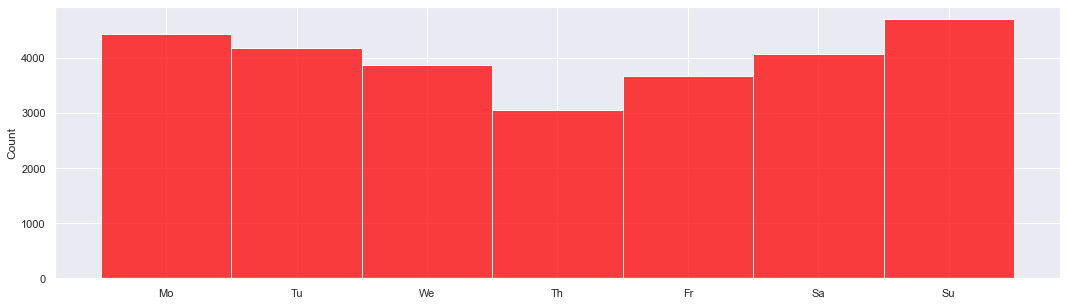

In [5]:
plt.figure(figsize = (18,5))


temp=[]


for i in df.iterrows():
    if(True and i[1]["hours"]<3.9):  #Mettere false per avere split a mezzanotte
        temp.append( m_d.Wday(i[1]["month"], i[1]["day"]-1) ) #Questo -1 è safe
    else:
        temp.append( m_d.Wday(i[1]["month"], i[1]["day"]) )
order=["Mo", "Tu", "We", "Th", "Fr", "Sa", "Su"]
temp=order+temp  #Utile per sortare
#A far bene toglierei 1 da ogni bin ma è chiaro che non sia importante

sns.histplot(data=temp, bins=30, color="#FF0000" )
plt.show()


**Risultato:** questo è interessante: la gente twitta in maniera piuttosto costante MA:
1) all'inizio della settimana lavorativa twitta di più verso la fine della settimana lavorativa \
2) nel weekend la gente tende a twittare di più \
3) se correggo per i tweets dopo mezzanotte (li considero come giorno prima, e sono molto rilevanti) il lunedì subisce un serio hit (la domenica notte è molto quotata come periodo di tweet) ma rimane comunque sopra al sabato


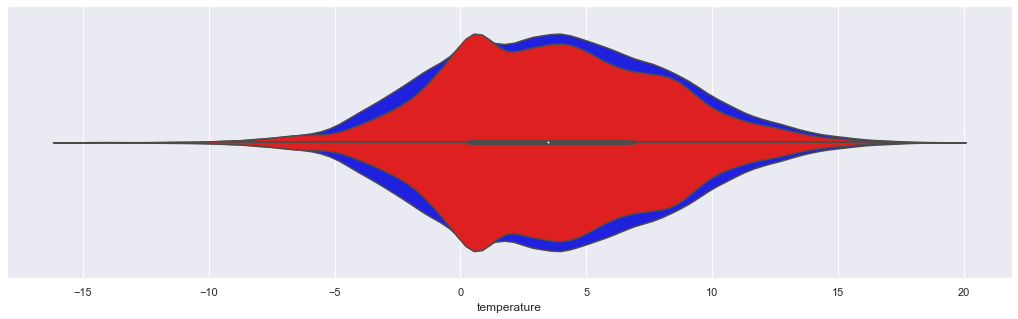

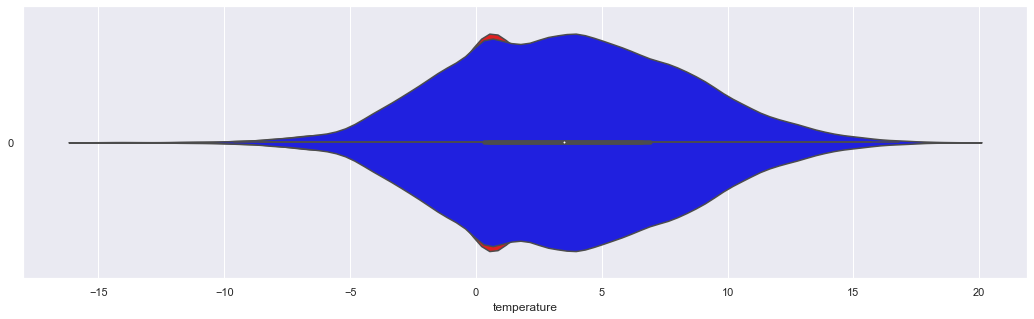

In [6]:
#Plot occurences versus temperatura
#Plotto anche la distribuzione temporale della temperatura
plt.figure(figsize = (18,5))

ax=sns.violinplot(data=temperature_D, color="#0000FF", orient='h')
ax=sns.violinplot(data=df, x="temperature", color="#FF0000")

plt.figure(figsize = (18,5))

ax=sns.violinplot(data=df, x="temperature", color="#FF0000")
ax=sns.violinplot(data=temperature_D, color="#0000FF", orient='h')

plt.show()
#Qua violin funziona meglio, distribuzioni più continue
#Nota: non so fare un plot del genere meglio di così (seaborn è buono per analisi base) quindi rip
    #Ho provato scale, alpha niente da fixare

**Risultato:** in prima approssimazione la distribuzione dei tweets segue la distribuzione temporale di temperatura (e quindi la gente twitta indipendentemente dalla temperatura). In realtà si nota che per temperature molto basse la gente tende a twittare poco (ricompare nell'anticorrelazione lineare, vedi sotto) mentre a temperatura alte twitta un po' di più. Degno di nota è il fatto che a circa 1° la gente twitta particolarmente tanto, magari sintomo di un tweet alla prima nevicata, ma con i dati sulle precipitazioni che non discriminano tra tipo di precipitazione è difficile trarre conclusioni certe

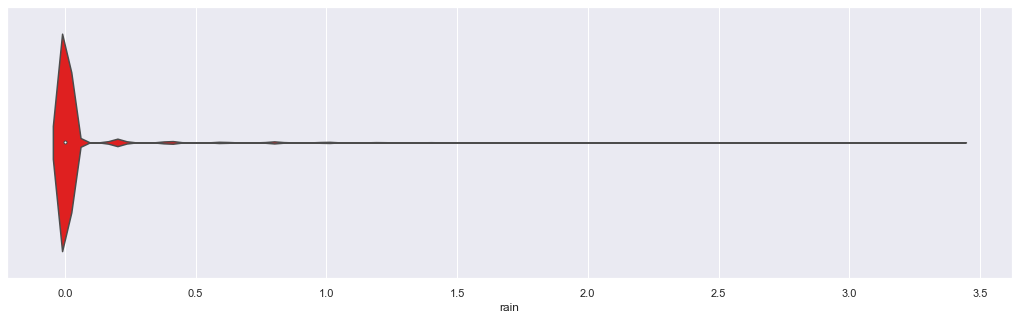

In [7]:
#Plot occurences versus rain
plt.figure(figsize = (18,5))
sns.violinplot(data=df, x="rain", color="#FF0000")
plt.show()

#Same as before, nella maggioranza dei casi la rain è 0, quindi gli unici casi rilevanti numericamente son quelli

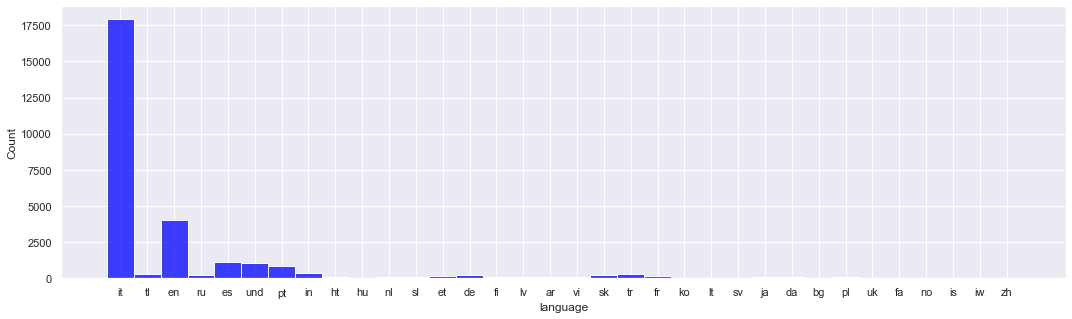

In [8]:
plt.figure(figsize = (18,5))
sns.histplot(data=df, x="language", bins=31, color="#0000FF")
plt.show()

#Italiano domina seguito da inglese, niente di strano
#Interessante sono i pochi tedeschi, ma per tardo autunno non è molto sorprendente

SafeImport_Output:   Index(['cellId', 'geometry'], dtype='object')


<AxesSubplot:>

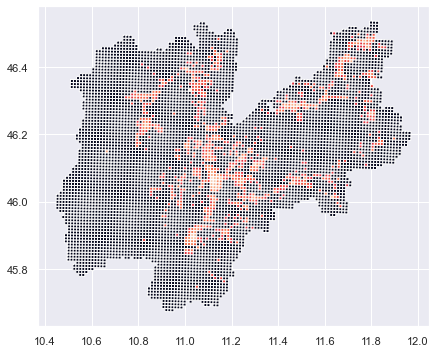

In [9]:
#Importiamo ora la grid
grid=m_d.safe_import("grid")

temp=[]
for i in range (0, len(grid)):
    temp.append( (grid.loc[i]["cellId"]==df["cellId"]).sum() )    
grid["Ntweets"]=temp

temp=[]
for i in range (0, len(grid)):
    temp.append( grid.loc[i]["Ntweets"]**0.07 )
grid["TweetsWeigh"]=temp
#Nota: questo plot lo devo creare pesando il numero di tweets in maniera diversa
#(Converto con distribuzione x^0.07) altrimenti il grafico rimane nero

grid.plot("TweetsWeigh")

#Distribuzione prevedibile, still è un bel plot

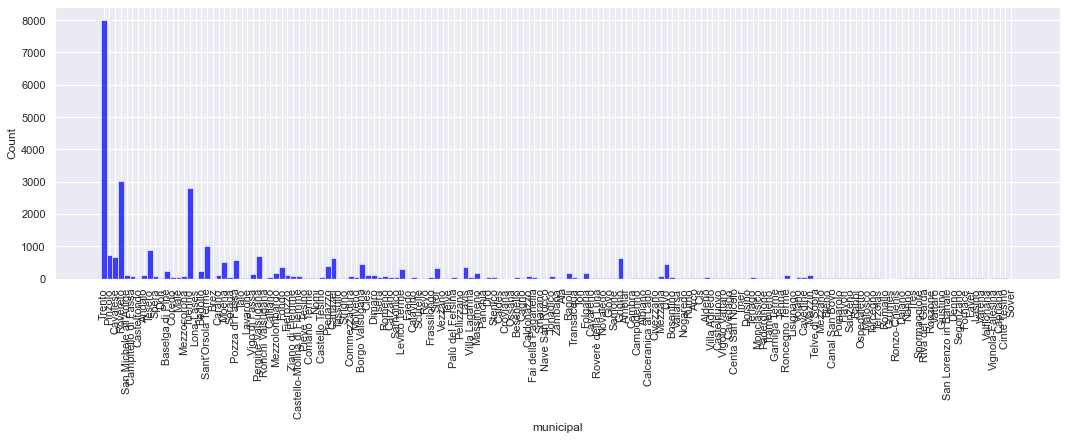

In [10]:
fig=plt.figure(figsize = (18,5))
ax = fig.add_subplot(111)
pl=sns.histplot(data=df, x="municipal", bins=31, color="#0000FF")
plt.xticks(rotation=90)
plt.show()
#far la figura più lunga la restringe wtf
#odio ufficialmente seaborne

#Trento domina nettamente, as axpected

# Tweets database
Tracciamo un po di correlazioni all'interno del database inteso per il machine learning

La matrice suggerisce che le relazioni lineari esistono tra numero di tweets di giorni successivi, e temperature medie, almeno in prima battuta (elettricità sarebbe il livello dopo). Visto che abbiam pochi dati restringersi a questo subset di features è probabilmente saggio (meglio aggiungere anche il giorno settimanale, che come abbiam visto influenza molto il numero di tweets)

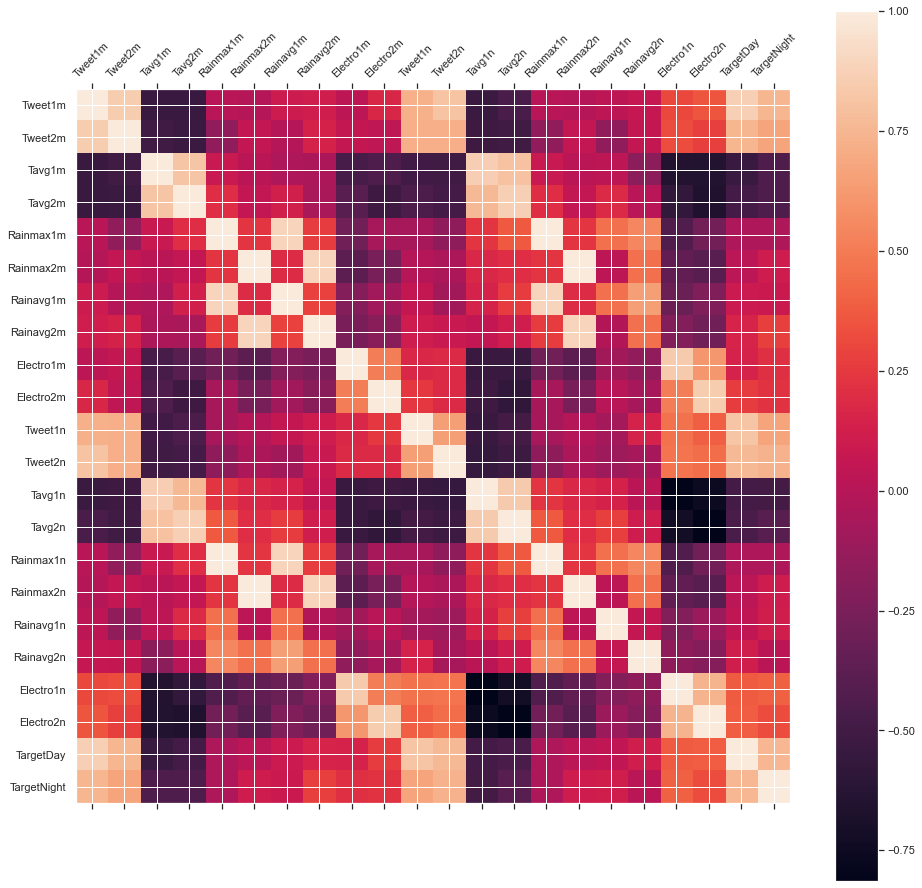

In [18]:
df=pd.read_csv(m_d.data_path_out / 'MachineLearningDB.csv')
correlations=df.corr(method='pearson', min_periods=1)
features=list(df.keys())
del features[-3]  #Rimuovo weekday

fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(111)

cax=ax.matshow(correlations)
fig.colorbar(cax)
ticks = np.arange(0,len(features),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(features,rotation=45)
ax.set_yticklabels(features)
plt.show()


In [20]:
correlations

,Tweet1m,Tweet2m,Tavg1m,Tavg2m,Rainmax1m,Rainmax2m,Rainavg1m,Rainavg2m,Electro1m,Electro2m,...,Tavg1n,Tavg2n,Rainmax1n,Rainmax2n,Rainavg1n,Rainavg2n,Electro1n,Electro2n,TargetDay,TargetNight
Tweet1m,1.000000,0.855387,-0.533147,-0.531717,0.013926,-0.001310,0.100588,0.120924,0.033169,0.166054,...,-0.526790,-0.465406,0.013926,-0.001310,0.034405,0.066419,0.307393,0.358878,0.867927,0.751667
Tweet2m,0.855387,1.000000,-0.504502,-0.524918,-0.152635,0.050849,-0.001909,0.136192,0.061060,0.041340,...,-0.510906,-0.504420,-0.152635,0.050849,-0.153028,0.061952,0.324235,0.272158,0.745773,0.670399
Tavg1m,-0.533147,-0.504502,1.000000,0.819140,0.082608,0.018890,-0.033998,-0.037128,-0.467539,-0.440850,...,0.863198,0.807609,0.082608,0.018890,0.029928,-0.170497,-0.638790,-0.646928,-0.541330,-0.440572
Tavg2m,-0.531717,-0.524918,0.819140,1.000000,0.206043,0.052721,0.133842,-0.052678,-0.399940,-0.509911,...,0.764945,0.871596,0.206043,0.052721,0.189363,0.010339,-0.568931,-0.653247,-0.480716,-0.438570
Rainmax1m,0.013926,-0.152635,0.082608,0.206043,1.000000,0.228137,0.886962,0.264532,-0.288275,-0.068364,...,0.241629,0.372443,1.000000,0.228137,0.457647,0.550341,-0.427070,-0.276782,-0.027874,-0.030532
Rainmax2m,-0.001310,0.050849,0.018890,0.052721,0.228137,1.000000,0.197322,0.886973,-0.380951,-0.257174,...,0.171416,0.204960,0.228137,1.000000,0.034373,0.457615,-0.350403,-0.395745,0.025619,0.111578
Rainavg1m,0.100588,-0.001909,-0.033998,0.133842,0.886962,0.197322,1.000000,0.285991,-0.210404,-0.089440,...,0.145123,0.258600,0.886962,0.197322,0.458481,0.646314,-0.310993,-0.218727,0.096293,0.086571
Rainavg2m,0.120924,0.136192,-0.037128,-0.052678,0.264532,0.886973,0.285991,1.000000,-0.248293,-0.187801,...,0.056166,0.119477,0.264532,0.886973,-0.010241,0.458471,-0.211444,-0.288371,0.156734,0.273322
Electro1m,0.033169,0.061060,-0.467539,-0.399940,-0.288275,-0.380951,-0.210404,-0.248293,1.000000,0.509928,...,-0.534615,-0.531418,-0.288275,-0.380951,-0.082215,-0.150150,0.837996,0.614623,0.147866,0.206991
Electro2m,0.166054,0.041340,-0.440850,-0.509911,-0.068364,-0.257174,-0.089440,-0.187801,0.509928,1.000000,...,-0.511788,-0.575119,-0.068364,-0.257174,0.014104,-0.065389,0.510974,0.854468,0.263674,0.225917


In [19]:
cond = (correlations[features[0:22]] > 0.85) & (correlations[features[0:22]] != 1)
correlations_85 = correlations[cond]
correlations_85 = correlations_85.stack()
print('Le features che correlano maggiormente tra di loro sono le seguenti: \n',correlations_85)

Le features che correlano maggiormente tra di loro sono le seguenti: 
 Tweet1m    Tweet2m      0.855387
           TargetDay    0.867927
Tweet2m    Tweet1m      0.855387
Tavg1m     Tavg1n       0.863198
Tavg2m     Tavg2n       0.871596
Rainmax1m  Rainavg1m    0.886962
Rainmax2m  Rainavg2m    0.886973
Rainavg1m  Rainmax1m    0.886962
           Rainmax1n    0.886962
Rainavg2m  Rainmax2m    0.886973
           Rainmax2n    0.886973
Electro2m  Electro2n    0.854468
Tavg1n     Tavg1m       0.863198
Tavg2n     Tavg2m       0.871596
Rainmax1n  Rainavg1m    0.886962
Rainmax2n  Rainavg2m    0.886973
Electro2n  Electro2m    0.854468
TargetDay  Tweet1m      0.867927
dtype: float64
